<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-Libaries" data-toc-modified-id="Loading-Libaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading Libaries</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Data</a></span><ul class="toc-item"><li><span><a href="#Shuffling-the-Dataset" data-toc-modified-id="Shuffling-the-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Shuffling the Dataset</a></span></li></ul></li><li><span><a href="#EDA-+--Data-Preparation" data-toc-modified-id="EDA-+--Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA +  Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Summary-of-the-data" data-toc-modified-id="Summary-of-the-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Summary of the data</a></span></li><li><span><a href="#Excluding-Object-Values" data-toc-modified-id="Excluding-Object-Values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Excluding Object Values</a></span></li><li><span><a href="#Splitting-Data" data-toc-modified-id="Splitting-Data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Splitting Data</a></span></li><li><span><a href="#K-Fold-+-Feature-Importances" data-toc-modified-id="K-Fold-+-Feature-Importances-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>K Fold + Feature Importances</a></span></li></ul></li><li><span><a href="#Building-and-Evaluating-models" data-toc-modified-id="Building-and-Evaluating-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building and Evaluating models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-Classifier" data-toc-modified-id="Logistic-Regression-Classifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression Classifier</a></span></li><li><span><a href="#Random-Forest-Classifer" data-toc-modified-id="Random-Forest-Classifer-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest Classifer</a></span></li><li><span><a href="#Gradient-Boosting-Classifier" data-toc-modified-id="Gradient-Boosting-Classifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Gradient Boosting Classifier</a></span></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>XGBoost Classifier</a></span></li><li><span><a href="#LightGBM-Classifier" data-toc-modified-id="LightGBM-Classifier-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>LightGBM Classifier</a></span></li></ul></li><li><span><a href="#Saving-Model-For-Deployment" data-toc-modified-id="Saving-Model-For-Deployment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Saving Model For Deployment</a></span></li></ul></div>

# Loading Libaries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

# Machine learning
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm 

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

# Seed (Random State)
SEED = 42

# Saving a Model 
import pickle

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading Data 

In [2]:
df = pd.read_csv('../data/test_music_features.csv')
df

,artist,artist_uri,artist_genre,album_name,album_uri,track_name,track_uri,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,time_signature,isWestern
0,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",THE ALBUM,spotify:album:71O60S5gIJSIAhdnrDIh3N,How You Like That,spotify:track:4SFknyjLcyTLJFPKD2m96o,0.812,0.800,11,...,0.0770,0.03750,0.000112,0.0638,0.3570,130.036,180947,85,4,0
1,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",THE ALBUM,spotify:album:71O60S5gIJSIAhdnrDIh3N,Ice Cream (with Selena Gomez),spotify:track:4JUPEh2DVSXFGExu4Uxevz,0.785,0.719,4,...,0.3540,0.03740,0.000108,0.0519,0.8870,159.953,175813,82,4,0
2,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",THE ALBUM,spotify:album:71O60S5gIJSIAhdnrDIh3N,Pretty Savage,spotify:track:1XnpzbOGptRwfJhZgLbmSr,0.695,0.583,9,...,0.0423,0.00657,0.000087,0.1040,0.3820,152.001,199120,83,4,0
3,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",THE ALBUM,spotify:album:71O60S5gIJSIAhdnrDIh3N,Bet You Wanna (feat. Cardi B),spotify:track:7iAgNZdotu40NwtoIWJHFe,0.665,0.674,7,...,0.1610,0.00386,0.000000,0.0734,0.7020,111.516,159173,83,4,0
4,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",THE ALBUM,spotify:album:71O60S5gIJSIAhdnrDIh3N,Lovesick Girls,spotify:track:4Ws314Ylb27BVsvlZOy30C,0.658,0.733,6,...,0.0586,0.00668,0.000000,0.1180,0.4640,127.977,192760,86,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,Lewis Capaldi,spotify:artist:4GNC7GD6oZMSxPGyXy4MNB,"['pop', 'uk pop']",Breach,spotify:album:0NVQ9k3wKmuK6T02lLMl6y,Something Borrowed - Demo,spotify:track:6UQGNRfns3nW2Nryl4aEGh,0.403,0.474,9,...,0.0416,0.55400,0.000000,0.1300,0.2610,167.416,195160,60,4,1
4495,Lewis Capaldi,spotify:artist:4GNC7GD6oZMSxPGyXy4MNB,"['pop', 'uk pop']","Grace (Hi, I’m Claude Remix)",spotify:album:7BFLE1KqHpQG64ZwEV2uCl,"Grace - Hi, I’m Claude Remix",spotify:track:7aZGfAhfJS7zQWbgZfyLSE,0.702,0.686,7,...,0.0824,0.01510,0.000452,0.3760,0.4750,123.047,227792,32,4,1
4496,Lewis Capaldi,spotify:artist:4GNC7GD6oZMSxPGyXy4MNB,"['pop', 'uk pop']",Grace,spotify:album:5SUsci66DN0gxvH2ujplhj,Grace,spotify:track:4eQBL0cuF3ismYCzBff2Ii,0.733,0.533,4,...,0.0357,0.49000,0.000000,0.1710,0.4830,104.506,184880,56,4,1
4497,Lewis Capaldi,spotify:artist:4GNC7GD6oZMSxPGyXy4MNB,"['pop', 'uk pop']",Tough (Remixes),spotify:album:2H2MxXPE6H2ivLKWIrvzvc,Tough - Madism Remix,spotify:track:5djF7Roo7NbPkH8JG4PgRv,0.614,0.599,1,...,0.0386,0.01710,0.000000,0.0776,0.2390,115.020,266853,37,4,1


## Shuffling the Dataset

In [3]:
df = df.sample(frac=1).reset_index(drop=True)
df

,artist,artist_uri,artist_genre,album_name,album_uri,track_name,track_uri,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,time_signature,isWestern
0,EXO,spotify:artist:3cjEqqelV9zb4BYE3qDQ4O,"['k-pop', 'k-pop boy group']",THE WAR - The 4th Album (Chinese Version),spotify:album:1JYpCaR0E36SXYC5bwnqhV,Forever - Chinese Version,spotify:track:4UjxNXzdlalUi8eDdeFy2C,0.607,0.83500,5,...,0.0929,0.06040,0.000000,0.3460,0.3730,144.633,230726,22,4,0
1,Justin Timberlake,spotify:artist:31TPClRtHm23RisEBtV3X7,"['dance pop', 'pop']",The Book of Love (Original Motion Picture Soun...,spotify:album:2H8u9DigrbmhweDlLr8twg,Pajamas,spotify:track:1JFeZSazt9XiyT2Pnusnm3,0.189,0.00385,0,...,0.0423,0.95500,0.576000,0.0847,0.0747,74.467,81493,25,1,1
2,BTS,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,"['k-pop', 'k-pop boy group']",You Never Walk Alone,spotify:album:7LF4N7lvyDhrPBuCJ1rplJ,Not Today,spotify:track:4hrpoqJMVE7FxBu1YWx0eQ,0.594,0.94600,8,...,0.1260,0.00181,0.000001,0.9230,0.6650,110.024,231860,71,4,0
3,EXO,spotify:artist:3cjEqqelV9zb4BYE3qDQ4O,"['k-pop', 'k-pop boy group']",EXO PLANET #3 -The EXO'rDIUM[dot]- Live Album,spotify:album:08fo0joy0UpsoxqNmCAE5O,Girl x Friend - Live,spotify:track:1EX6P9VWWNmsgZMNjLvtOf,0.311,0.89300,0,...,0.3230,0.09860,0.000000,0.4720,0.2720,190.079,219043,28,4,0
4,Justin Bieber,spotify:artist:1uNFoZAHBGtllmzznpCI3s,"['canadian pop', 'dance pop', 'pop', 'post-tee...",Under The Mistletoe,spotify:album:0sH0tKZWzQlRVGv9rcwYEp,Silent Night,spotify:track:5Mc0o4NwxnxQKrnw6Bixyb,0.286,0.03460,3,...,0.0404,0.95800,0.000000,0.1150,0.1720,77.386,169427,20,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,"['canadian contemporary r&b', 'canadian pop', ...",Starboy,spotify:album:2ODvWsOgouMbaA5xf0RkJe,Ordinary Life,spotify:track:15k2nBQJ0teDmPZHrOXL2N,0.537,0.58700,7,...,0.0771,0.02750,0.000000,0.0961,0.3650,149.748,221920,65,4,1
4495,ZICO,spotify:artist:4XpUIb8uuNlIWVKmgKZXC0,"['k-pop', 'k-rap', 'korean pop', 'korean r&b']",THINKING Part.2,spotify:album:6HcRiA5scMhgM5lBMKX2ad,Dystopia,spotify:track:0CRjIqMLZtruVAczY7docw,0.528,0.77600,2,...,0.2670,0.08680,0.000012,0.0841,0.5670,140.275,237440,36,5,0
4496,Red Velvet,spotify:artist:1z4g3DjTBBZKhvAroFlhOM,"['k-pop', 'k-pop girl group']",The Velvet - The 2nd Mini Album,spotify:album:2qgl7dAgslqL1w2l2wQhMA,처음인가요 First Time,spotify:track:4BeYVQC4uQGwEnLOeOo2ch,0.530,0.53600,9,...,0.0302,0.50400,0.000000,0.1120,0.3120,129.878,242305,42,4,0
4497,Got7,spotify:artist:6nfDaffa50mKtEOwR8g4df,"['k-pop', 'k-pop boy group']",FLIGHT LOG : ARRIVAL,spotify:album:5r30o1iIr8sdoRsu6qPKrK,Q,spotify:track:2LMRc0QFAtRYXbZ1MNamcr,0.742,0.72700,0,...,0.1050,0.29400,0.000000,0.1070,0.8530,106.005,200353,13,4,0


# EDA +  Data Preparation

## Summary of the data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            4499 non-null   object 
 1   artist_uri        4499 non-null   object 
 2   artist_genre      4499 non-null   object 
 3   album_name        4499 non-null   object 
 4   album_uri         4499 non-null   object 
 5   track_name        4499 non-null   object 
 6   track_uri         4499 non-null   object 
 7   danceability      4499 non-null   float64
 8   energy            4499 non-null   float64
 9   key               4499 non-null   int64  
 10  loudness          4499 non-null   float64
 11  mode              4499 non-null   int64  
 12  speechiness       4499 non-null   float64
 13  acousticness      4499 non-null   float64
 14  instrumentalness  4499 non-null   float64
 15  liveness          4499 non-null   float64
 16  valence           4499 non-null   float64


In [5]:
df.isnull().sum()

artist              0
artist_uri          0
artist_genre        0
album_name          0
album_uri           0
track_name          0
track_uri           0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
popularity          0
time_signature      0
isWestern           0
dtype: int64

## Excluding Object Values 

In [6]:
## Drop Object 
df = df.select_dtypes(exclude=['object'])
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,time_signature,isWestern
0,0.607,0.83500,5,-3.281,0,0.0929,0.06040,0.000000,0.3460,0.3730,144.633,230726,22,4,0
1,0.189,0.00385,0,-38.370,0,0.0423,0.95500,0.576000,0.0847,0.0747,74.467,81493,25,1,1
2,0.594,0.94600,8,-3.408,1,0.1260,0.00181,0.000001,0.9230,0.6650,110.024,231860,71,4,0
3,0.311,0.89300,0,-4.764,1,0.3230,0.09860,0.000000,0.4720,0.2720,190.079,219043,28,4,0
4,0.286,0.03460,3,-18.395,1,0.0404,0.95800,0.000000,0.1150,0.1720,77.386,169427,20,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,0.537,0.58700,7,-7.486,0,0.0771,0.02750,0.000000,0.0961,0.3650,149.748,221920,65,4,1
4495,0.528,0.77600,2,-4.509,0,0.2670,0.08680,0.000012,0.0841,0.5670,140.275,237440,36,5,0
4496,0.530,0.53600,9,-5.145,1,0.0302,0.50400,0.000000,0.1120,0.3120,129.878,242305,42,4,0
4497,0.742,0.72700,0,-2.515,1,0.1050,0.29400,0.000000,0.1070,0.8530,106.005,200353,13,4,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4499 non-null   float64
 1   energy            4499 non-null   float64
 2   key               4499 non-null   int64  
 3   loudness          4499 non-null   float64
 4   mode              4499 non-null   int64  
 5   speechiness       4499 non-null   float64
 6   acousticness      4499 non-null   float64
 7   instrumentalness  4499 non-null   float64
 8   liveness          4499 non-null   float64
 9   valence           4499 non-null   float64
 10  tempo             4499 non-null   float64
 11  duration_ms       4499 non-null   int64  
 12  popularity        4499 non-null   int64  
 13  time_signature    4499 non-null   int64  
 14  isWestern         4499 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 527.4 KB


## Splitting Data

In [8]:
X = df.drop(['isWestern'], axis=1)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,time_signature
0,0.607,0.83500,5,-3.281,0,0.0929,0.06040,0.000000,0.3460,0.3730,144.633,230726,22,4
1,0.189,0.00385,0,-38.370,0,0.0423,0.95500,0.576000,0.0847,0.0747,74.467,81493,25,1
2,0.594,0.94600,8,-3.408,1,0.1260,0.00181,0.000001,0.9230,0.6650,110.024,231860,71,4
3,0.311,0.89300,0,-4.764,1,0.3230,0.09860,0.000000,0.4720,0.2720,190.079,219043,28,4
4,0.286,0.03460,3,-18.395,1,0.0404,0.95800,0.000000,0.1150,0.1720,77.386,169427,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,0.537,0.58700,7,-7.486,0,0.0771,0.02750,0.000000,0.0961,0.3650,149.748,221920,65,4
4495,0.528,0.77600,2,-4.509,0,0.2670,0.08680,0.000012,0.0841,0.5670,140.275,237440,36,5
4496,0.530,0.53600,9,-5.145,1,0.0302,0.50400,0.000000,0.1120,0.3120,129.878,242305,42,4
4497,0.742,0.72700,0,-2.515,1,0.1050,0.29400,0.000000,0.1070,0.8530,106.005,200353,13,4


In [9]:
y = df['isWestern']
y

0       0
1       1
2       0
3       0
4       1
       ..
4494    1
4495    0
4496    0
4497    0
4498    0
Name: isWestern, Length: 4499, dtype: int64

In [10]:
X_array = np.array(X)
X_array

array([[6.07000e-01, 8.35000e-01, 5.00000e+00, ..., 2.30726e+05,
        2.20000e+01, 4.00000e+00],
       [1.89000e-01, 3.85000e-03, 0.00000e+00, ..., 8.14930e+04,
        2.50000e+01, 1.00000e+00],
       [5.94000e-01, 9.46000e-01, 8.00000e+00, ..., 2.31860e+05,
        7.10000e+01, 4.00000e+00],
       ...,
       [5.30000e-01, 5.36000e-01, 9.00000e+00, ..., 2.42305e+05,
        4.20000e+01, 4.00000e+00],
       [7.42000e-01, 7.27000e-01, 0.00000e+00, ..., 2.00353e+05,
        1.30000e+01, 4.00000e+00],
       [5.54000e-01, 8.84000e-01, 5.00000e+00, ..., 1.88693e+05,
        4.20000e+01, 4.00000e+00]])

In [11]:
y_array = np.array(y)
y_array

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

## K Fold + Feature Importances 

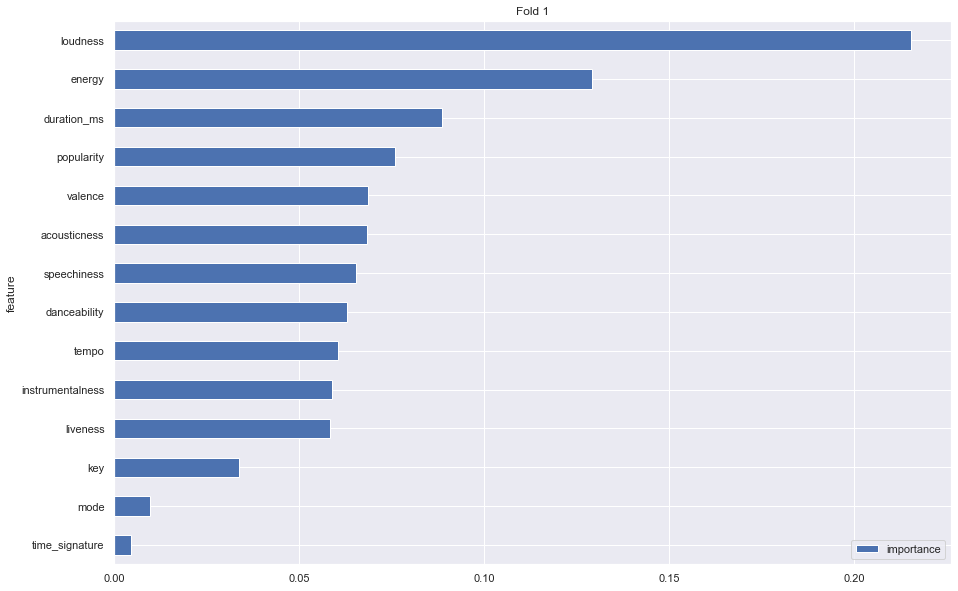

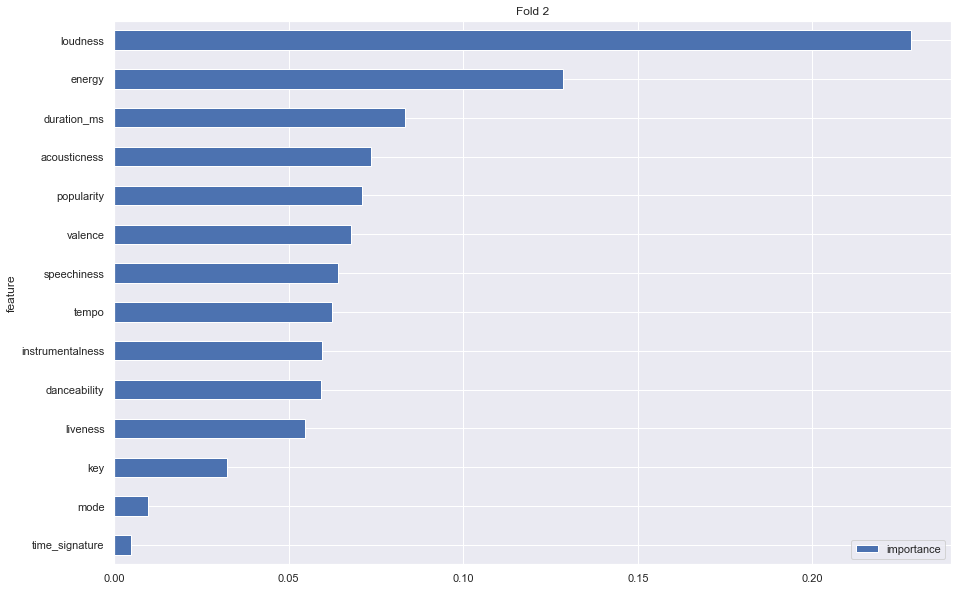

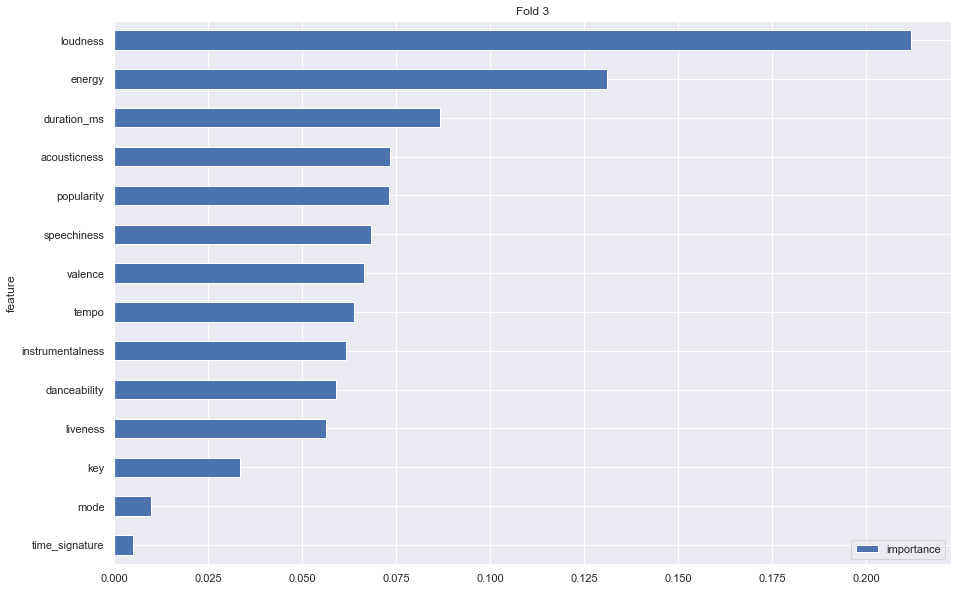

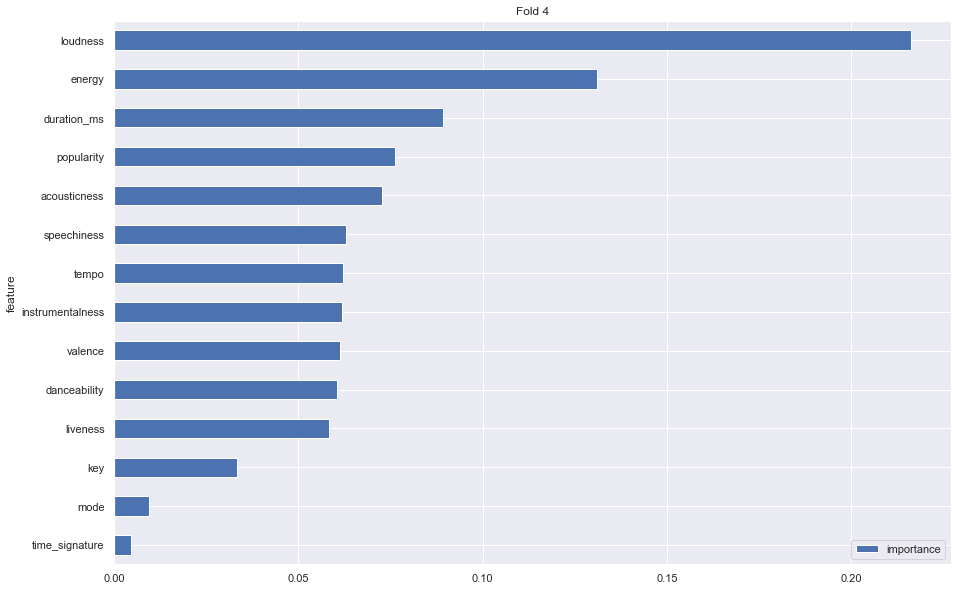

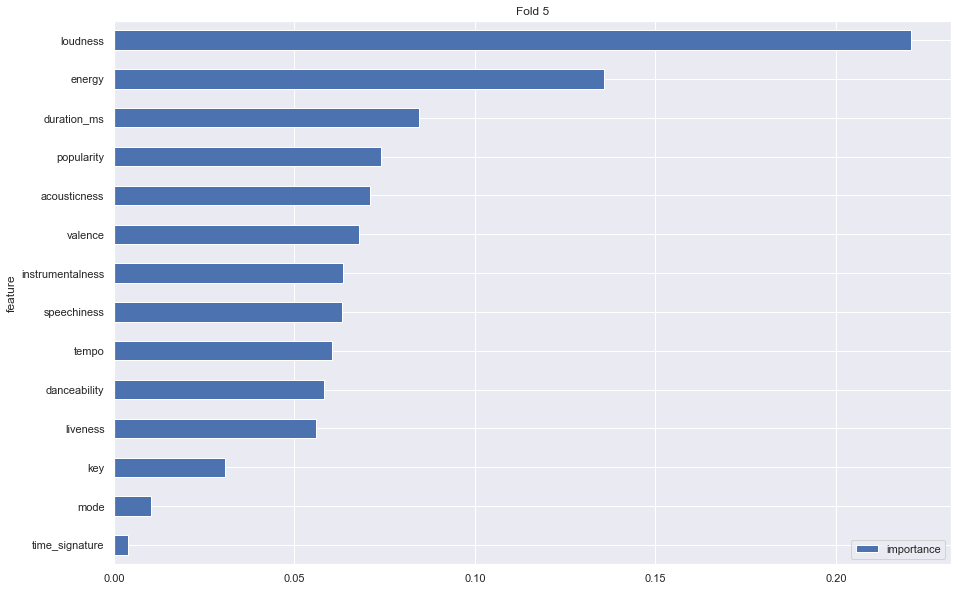

In [12]:
kf = KFold(n_splits=5, random_state=SEED)

i = 1

def determine_feature_importance(i, X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier(random_state=42)
    clf = clf.fit(X_train, y_train)
    features = pd.DataFrame()
    features['feature'] = X.columns
    features['importance'] = clf.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    features.plot(kind='barh', figsize=(15,10), title=f'Fold {i}')

for train_index, test_index in kf.split(X):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    determine_feature_importance(i, X_train, y_train, X_test, y_test)
    i += 1

# Building and Evaluating models

In [13]:
def compute_cross_val(clf, X, y):
    avg_cross_val = np.mean(cross_val_score(clf, X, y, cv = 5, scoring='accuracy'))
    return avg_cross_val

def confusion_matrix_display(y, predicted_model, model_name):
    cm = confusion_matrix(y, predicted_model)
    
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    print(f"Confusion Matrix for {model_name} cross validated:")

    sns.heatmap(cm, annot=labels, fmt='')

    plt.show()

## Logistic Regression Classifier

Cross Validation Score of LogisticRegression: 0.5194465455444319
Classification report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.56      0.10      0.17      2209
           1       0.52      0.93      0.66      2290

    accuracy                           0.52      4499
   macro avg       0.54      0.51      0.41      4499
weighted avg       0.54      0.52      0.42      4499

Confusion Matrix for Logistic Regression cross validated:


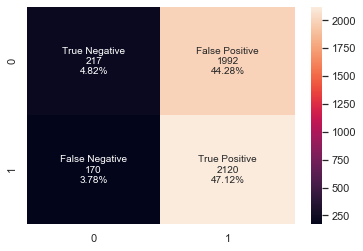

In [14]:
score_lg = compute_cross_val(LogisticRegression(), X, y)
print('Cross Validation Score of LogisticRegression: {}'.format(score_lg))

predicted_lg = cross_val_predict(LogisticRegression(), X, y)
report_lg = classification_report(y, predicted_lg)
print("Classification report for Logistic Regression: \n{}".format(report_lg))

#confusion matrix
confusion_matrix_display(y, predicted_lg, 'Logistic Regression')

## Random Forest Classifer

Cross Validation Score of Random Forest Classifier: 0.8601886046224199
Classification report for Random Forest Classifier: 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2209
           1       0.85      0.87      0.86      2290

    accuracy                           0.85      4499
   macro avg       0.85      0.85      0.85      4499
weighted avg       0.85      0.85      0.85      4499

Confusion Matrix for Random Forest Classifier cross validated:


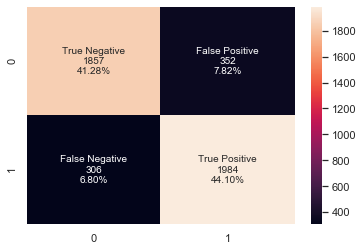

In [15]:
score_rf = compute_cross_val(RandomForestClassifier(random_state=SEED, bootstrap=False, n_estimators=125, n_jobs=4), X, y)
print('Cross Validation Score of Random Forest Classifier: {}'.format(score_rf))

predicted_rf = cross_val_predict(RandomForestClassifier(random_state=SEED), X, y)
report_rf = classification_report(y, predicted_rf)
print("Classification report for Random Forest Classifier: \n{}".format(report_rf))

#confusion matrix
confusion_matrix_display(y, predicted_rf, 'Random Forest Classifier')

## Gradient Boosting Classifier

Cross Validation Score of Gradient Boosting Classifier: 0.8050653812878508
Classification report for Gradient Boosting Classifier: 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2209
           1       0.80      0.82      0.81      2290

    accuracy                           0.81      4499
   macro avg       0.81      0.80      0.80      4499
weighted avg       0.81      0.81      0.81      4499

Confusion Matrix for Gradient Boosting Classifier cross validated:


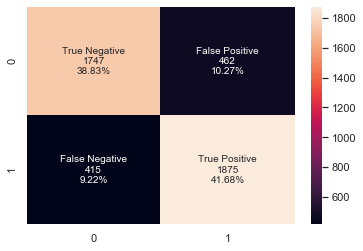

In [16]:
score_gbc = compute_cross_val(GradientBoostingClassifier(random_state=SEED), X, y)
print('Cross Validation Score of Gradient Boosting Classifier: {}'.format(score_gbc))

predicted_gbc = cross_val_predict(GradientBoostingClassifier(random_state=SEED), X, y)
report_gbc = classification_report(y, predicted_gbc)
print("Classification report for Gradient Boosting Classifier: \n{}".format(report_gbc))

#confusion matrix
confusion_matrix_display(y, predicted_gbc, 'Gradient Boosting Classifier')

## XGBoost Classifier

Cross Validation Score of XGBoost Classifier: 0.8012876035100728
Classification report for XGBoost Classifier: 
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      2209
           1       0.80      0.81      0.81      2290

    accuracy                           0.80      4499
   macro avg       0.80      0.80      0.80      4499
weighted avg       0.80      0.80      0.80      4499

Confusion Matrix for XGBoost Classifier cross validated:


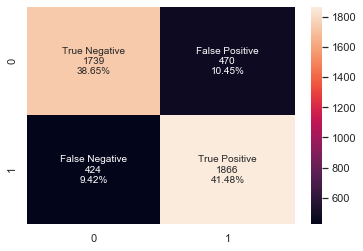

In [17]:
score_xgb = compute_cross_val(XGBClassifier(random_state=SEED), X, y)
print('Cross Validation Score of XGBoost Classifier: {}'.format(score_xgb))

predicted_xgb = cross_val_predict(XGBClassifier(random_state=SEED), X, y)
report_xgb = classification_report(y, predicted_xgb)
print("Classification report for XGBoost Classifier: \n{}".format(report_xgb))

#confusion matrix
confusion_matrix_display(y, predicted_xgb, 'XGBoost Classifier')

## LightGBM Classifier

Cross Validation Score of LIGHTGBM Classifier: 0.8468532937832158
Classification report for LIGHTGBM Classifier: 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2209
           1       0.84      0.85      0.85      2290

    accuracy                           0.84      4499
   macro avg       0.84      0.84      0.84      4499
weighted avg       0.84      0.84      0.84      4499

Confusion Matrix for LIGHTGBM Classifier cross validated:


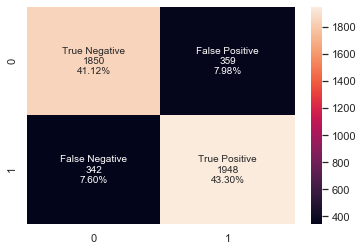

In [18]:
score_lgbm = compute_cross_val(LGBMClassifier(random_state=SEED, n_estimators=125, n_jobs=4), X, y)
print('Cross Validation Score of LIGHTGBM Classifier: {}'.format(score_lgbm))

predicted_lgbm = cross_val_predict(LGBMClassifier(random_state=SEED), X, y)
report_lgbm = classification_report(y, predicted_lgbm)
print("Classification report for LIGHTGBM Classifier: \n{}".format(report_lgbm))

#confusion matrix
confusion_matrix_display(y, predicted_lgbm, 'LIGHTGBM Classifier')

# Saving Model For Deployment 

In [19]:
rf_model = RandomForestClassifier(random_state=SEED)
rf_model = rf_model.fit(X, y)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [20]:
filename = 'rf_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))